In [2]:
pip install optuna

     |████████████████████████████████| 296kB 8.5MB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 163kB 12.1MB/s 
     |████████████████████████████████| 143kB 14.5MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 112kB 17.1MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=f9ed7f08a23c663fb802f77aa923775fae1425f1a1b3efd5c49bc96733fc8065
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [3]:

import pandas as pd
import numpy as np
from numpy import cov
import statistics
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import optuna
import sklearn.model_selection

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
from sklearn import tree
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

https://pubmed.ncbi.nlm.nih.gov/18072480/

In [6]:
missing_values = ["?","n/a","na"]
data_label = pd.read_csv("mammographic_masses.data",header=None,names=['BI-RADS','Age','Shape','Margin','Density','Severity'],na_values=missing_values)

In [7]:
data = data_label.iloc[:,0:5]

In [56]:
data

,BI-RADS,Age,Shape,Margin,Density
0,5.0,67.0,3.0,5.0,3.000000
1,4.0,43.0,1.0,1.0,2.910734
2,5.0,58.0,4.0,5.0,3.000000
3,4.0,28.0,1.0,1.0,3.000000
4,5.0,74.0,1.0,5.0,2.910734
...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.000000
957,4.0,56.0,4.0,5.0,3.000000
958,4.0,64.0,4.0,5.0,3.000000
959,5.0,66.0,4.0,5.0,3.000000


In [9]:
labels = data_label[['Severity']]


<h3><u>Exploratory Data Analysis<u></h3>

In [10]:
print(data.shape)
print(labels.shape)

(961, 5)
(961, 1)


- <u>shape</u> <br>
the dataset has 961 samples with 5 columns <br>
and the target has 961 samples with 1 column<br>

In [11]:
set(labels['Severity'])

{0, 1}

- <u>outcomes</u> <br>
the labels are 0 or 1 stating benign or malignant respectively

In [12]:
data.head()

,BI-RADS,Age,Shape,Margin,Density
0,5.0,67.0,3.0,5.0,3.0
1,4.0,43.0,1.0,1.0,NaN
2,5.0,58.0,4.0,5.0,3.0
3,4.0,28.0,1.0,1.0,3.0
4,5.0,74.0,1.0,5.0,NaN


In [13]:
labels.head()

,Severity
0,1
1,1
2,1
3,0
4,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BI-RADS  959 non-null    float64
 1   Age      956 non-null    float64
 2   Shape    930 non-null    float64
 3   Margin   913 non-null    float64
 4   Density  885 non-null    float64
dtypes: float64(5)
memory usage: 37.7 KB


- <u>datatype </u><br>
All the columns are of type float

In [15]:
print(data.isnull().values.any())
print(data.isnull().sum().sum())

True
162


In [16]:
data.isnull().sum()*100/len(data)

BI-RADS    0.208117
Age        0.520291
Shape      3.225806
Margin     4.994797
Density    7.908429
dtype: float64

In [17]:
data.isnull().sum()

BI-RADS     2
Age         5
Shape      31
Margin     48
Density    76
dtype: int64

- <u>Miising Values</u><br>
we can see in the above output that there are certain percentage of null values in the columns <br>
and in total we have 162 values missing in the whole dataset <br>

- <u>Imbalance </u> <br>
we can observe that the number of samples are approx uniformly distributed 

In [18]:
labels['Severity'].value_counts()

0    516
1    445
Name: Severity, dtype: int64

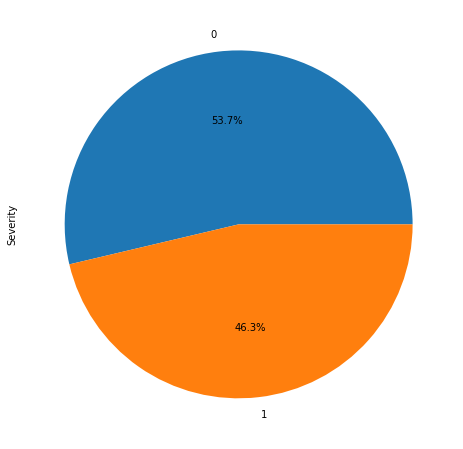

In [19]:
#ax = sns.countplot(x="Severity", data=labels)
labels.Severity.value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8))

In [20]:
data.describe()

,BI-RADS,Age,Shape,Margin,Density
count,959.000000,956.000000,930.000000,913.000000,885.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734
std,1.783031,14.480131,1.242792,1.566546,0.380444
min,0.000000,18.000000,1.000000,1.000000,1.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000


we can see that there is a difference in the count, its due to the missing values in each column <br>
also the max of BI_RADS is 55 which is an outlier as the values in that column range from 0 to 5 <br>

- <u>Correlation</u> <br>

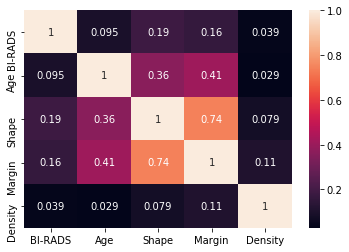

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.corr()

,BI-RADS,Age,Shape,Margin,Density
BI-RADS,1.000000,0.094754,0.186055,0.163086,0.038729
Age,0.094754,1.000000,0.364077,0.411355,0.028954
Shape,0.186055,0.364077,1.000000,0.742211,0.078666
Margin,0.163086,0.411355,0.742211,1.000000,0.109392
Density,0.038729,0.028954,0.078666,0.109392,1.000000


we can observe that : <br>
Margin and Shape have 74% positive correlation i.e as shape increase the margin also increases <br>
Similarly margin and age has a positive correlation <br>
and shape and age has a positive correlation <br>


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


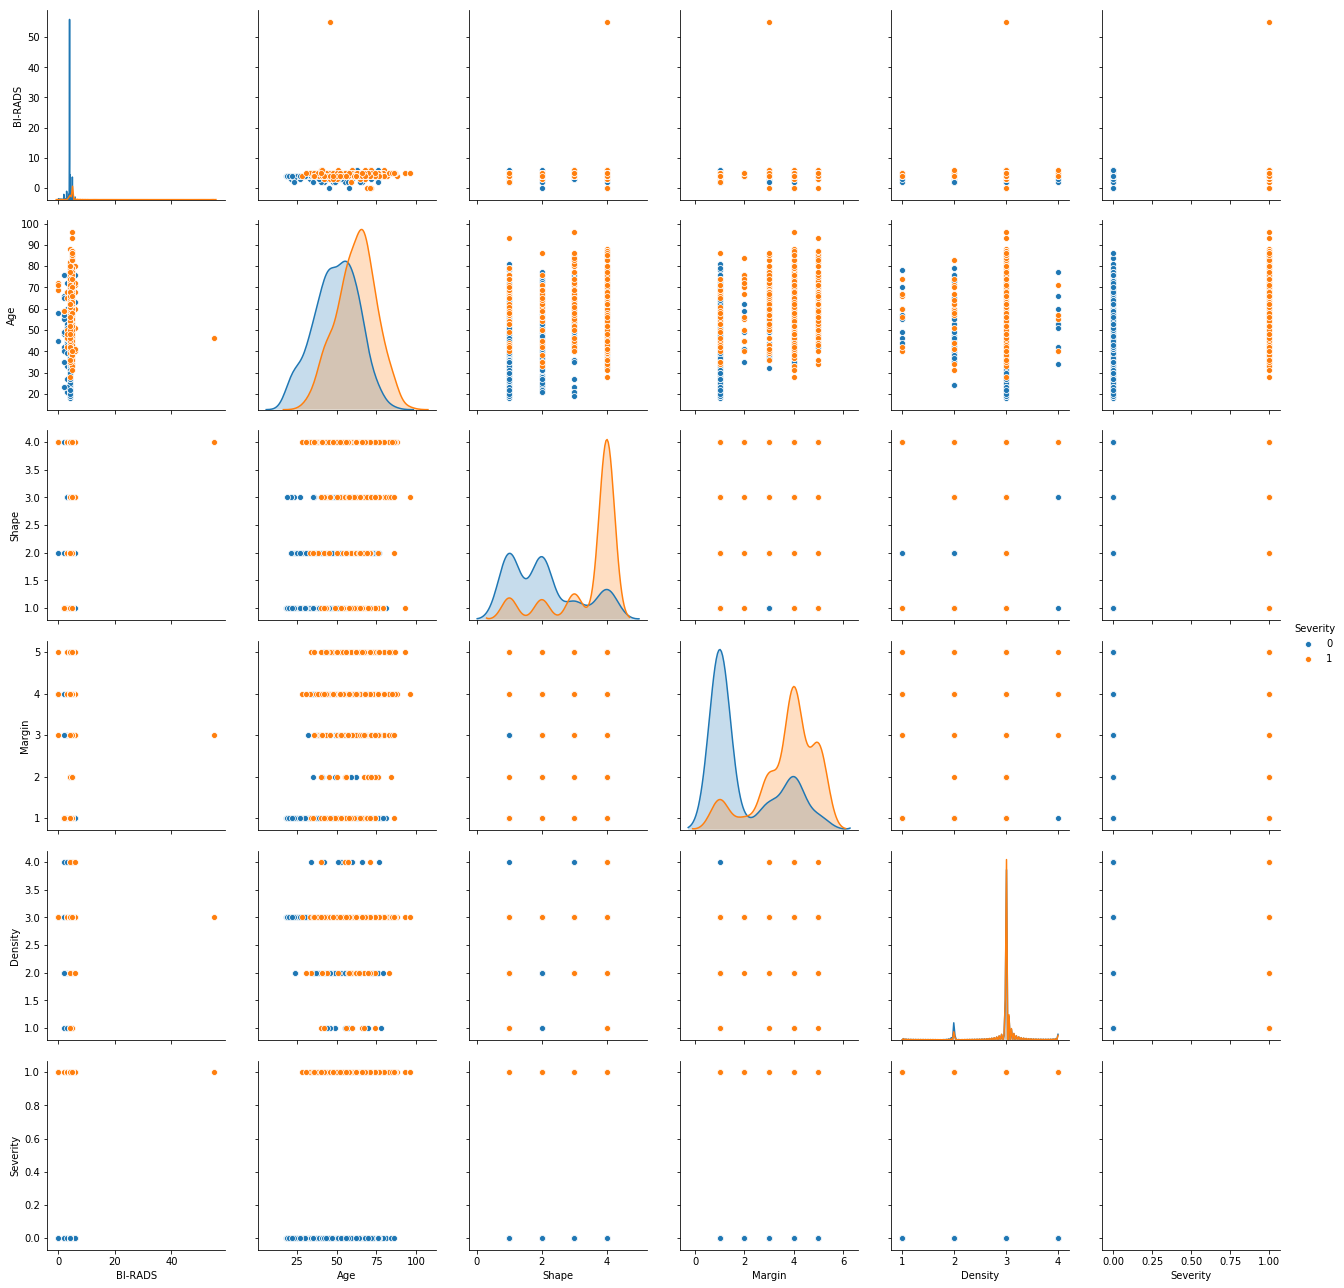

In [ ]:
sns.pairplot(data_label, hue="Severity", size=3) 

So what does all these graphs say <br>
lets take x-axis "shape" and y-axis "age" : <br>
An age group of 20 to 40 even if the shape of the tumor increases the cancer is benign <br>
But as we grow older the shape of the tumor does signify a malignant tumor. <br>

thus these graphs helps us to see how two propreties affect each other in the prediction of the severity of the cancer. <br>

- <u>categorical data <u><br>

we have  BI-RADS which is categorical but is already encoded numerically with oridinality maintained


- <u> Missing Values </u> <br>
we have 162 missing values , we are not going to drop the rows with missing values as we have only 961 samples, we loose important information <br>
I have decided to replace age with the mode <br>
the rest of the features with their mean. <br>

In [21]:
for col in data.columns:
    if col == "Age" or col =="BI-RADS":
        data[col] = data[col].replace(to_replace =np.nan,value=statistics.mode(data[col]))
    else:
        data[col] = data[col].replace(to_replace = np.nan,value = data[col].mean())

In [ ]:
print(data.isnull().sum().sum())

0


In [22]:
data.isnull().sum()

BI-RADS    0
Age        0
Shape      0
Margin     0
Density    0
dtype: int64

<br>

- <u>Training the Models </u> <br>


splitting the data into train,development and test <br>

In [23]:
#first split it into train = 80 and test = 20
temp_data, test_data, temp_label, test_label  = train_test_split(data, labels, test_size=0.2, random_state=10,stratify=labels)

In [24]:
# now take train which is 80% of total and split it further to create validation set
#80*25% will give 0.2
train_data, val_data, train_label, val_label  = train_test_split(temp_data, temp_label, test_size=0.25, random_state=10,stratify=temp_label)

1.) in the literature they have used decision trees 

In [25]:
model = tree.DecisionTreeClassifier(max_depth=10,random_state=10)

In [26]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [27]:
model.fit(train_data, train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [28]:
y_predict = model.predict(val_data)

In [29]:
f1_score(val_label, y_predict)*100

79.31034482758619

In [30]:
model.tree_.max_depth

10

going with the default hyper-parameter setting, the depth of the tree formed is 17 on the training model, I feel it is overfitting the data. Hence setting the depth to 10

In [31]:

y_predict = model.predict(test_data)
f1_score(test_label, y_predict)

0.7529411764705881

2.) Perceptron since this dataset has binary classification

In [32]:
model2 = Perceptron(tol=1e-3, random_state=10)

In [33]:
model2.fit(train_data, train_label.iloc[:,0].ravel())

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=10, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
y_predict = model2.predict(val_data)

In [35]:
f1_score(val_label, y_predict)

0.7608695652173914

In [36]:
y_predict = model2.predict(test_data)
f1_score(test_label, y_predict)

0.7555555555555554

3.) Logistic Regression Classifier 

In [37]:
model3 = LogisticRegression(random_state=10,solver="newton-cg").fit(train_data, train_label.iloc[:,0].ravel())

In [38]:
y_predict = model3.predict(val_data)
f1_score(val_label, y_predict)

0.8111111111111112

In [39]:
y_predict = model3.predict(test_data)
f1_score(test_label, y_predict)

0.7999999999999998

In [40]:
accuracy_score(test_label, y_predict)

0.8134715025906736

4.)KNN

In [41]:
model4 = KNeighborsClassifier(n_neighbors=7,weights="distance").fit(train_data,train_label.iloc[:,0].ravel())

In [ ]:
y_predict = model4.predict(val_data)
f1_score(val_label, y_predict)

In [43]:
y_predict = model4.predict(test_data)
f1_score(test_label, y_predict)

0.6951219512195121

5.) SVC

In [46]:
model5 = SVC(kernel="linear",gamma="scale",random_state=10).fit(train_data,train_label.iloc[:,0].ravel())

In [47]:
y_predict = model5.predict(val_data)
f1_score(val_label, y_predict)

0.7804878048780487

In [48]:
y_predict = model5.predict(test_data)
f1_score(test_label, y_predict)

0.7388535031847134

<br>

5.) Multi Layer Perceptron 

In [ ]:
# model5 = MLPClassifier(alpha=0.01, hidden_layer_sizes = (100,), max_iter = 100, 
#                  verbose = 'True', learning_rate = 'adaptive')
# # model4.out_activation_ = 'softmax'
# model5.fit(train_data,train_label.iloc[:,0].ravel())

Iteration 1, loss = 0.85373670
Iteration 2, loss = 0.82860232
Iteration 3, loss = 0.78101582
Iteration 4, loss = 0.77923839
Iteration 5, loss = 0.76300327
Iteration 6, loss = 0.73373367
Iteration 7, loss = 0.72339100
Iteration 8, loss = 0.70776500
Iteration 9, loss = 0.69609156
Iteration 10, loss = 0.68583334
Iteration 11, loss = 0.67642173
Iteration 12, loss = 0.66575180
Iteration 13, loss = 0.65299750
Iteration 14, loss = 0.63935119
Iteration 15, loss = 0.62845417
Iteration 16, loss = 0.61955561
Iteration 17, loss = 0.61391612
Iteration 18, loss = 0.60814247
Iteration 19, loss = 0.60361612
Iteration 20, loss = 0.59833641
Iteration 21, loss = 0.59315420
Iteration 22, loss = 0.58675677
Iteration 23, loss = 0.58402055
Iteration 24, loss = 0.57896478
Iteration 25, loss = 0.57476193
Iteration 26, loss = 0.57020228
Iteration 27, loss = 0.56597113
Iteration 28, loss = 0.56316545
Iteration 29, loss = 0.55923751
Iteration 30, loss = 0.55655016
Iteration 31, loss = 0.55314101
Iteration 32, los

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose='True', warm_start=False)

In [ ]:
# y_predict = model5.predict(val_data)
# f1_score(val_label, y_predict)

0.7980295566502463

In [ ]:
# y_predict = model5.predict(test_data)
# f1_score(test_label, y_predict)

0.7936507936507935

<br>

 Hyper-paramtere tuning using optuna <br>
 since optuna doesnt need a held out validation set I will be using a temp_data and temp_label which has dev and validation in it.

In [49]:
def objective_classifier(trial): 
    
    classifier_name = trial.suggest_categorical("classifier", ["DecisionTree", "LogisticRegression", "KNN","SVC"])
    
    if classifier_name == "DecisionTree":
        max_depth = trial.suggest_int("max_depth", 5,20, step=5, log=False)
        criterion = trial.suggest_categorical("criterion",["gini","entropy"])
        min_samples_split = trial.suggest_int("min_samples_split",2,5,step=1,log=False)
        model = tree.DecisionTreeClassifier(max_depth=max_depth,criterion=criterion,min_samples_split=min_samples_split,random_state=10)
        
    elif classifier_name == "LogisticRegression":
#         penalty = trial.suggest_categorical("penalty", [ "l2", "elasticnet", "none"])
        solver = trial.suggest_categorical("solver",[ "lbfgs", "liblinear", "sag", "saga"])
        model = LogisticRegression(random_state=10,solver=solver)

    elif classifier_name == "KNN":
        n_neighbors = trial.suggest_int("n_neighbors",5,15,step=1,log=False)
        algorithm = trial.suggest_categorical("algorithm", ["auto", "ball_tree", "kd_tree", "brute"])
        metric = trial.suggest_categorical("metric",["euclidean","manhattan","chebyshev","minkowski"])
        weights = trial.suggest_categorical("weights",["uniform","distance"])
        model = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm=algorithm,metric=metric,weights=weights)
    
    elif classifier_name == "SVC":
        kernel = trial.suggest_categorical("kernel", ["linear","poly","rbf","sigmoid","precomputed"])
        gamma = trial.suggest_categorical("gamma", ["auto","scale"])
        model= SVC(random_state=10,kernel=kernel,gamma=gamma)
    score = sklearn.model_selection.cross_val_score(model, temp_data, temp_label.iloc[:,0].ravel(), cv=3)
    accuracy = score.mean()
    
    return accuracy

In [50]:
cstudy = optuna.create_study(direction="maximize")
cstudy.optimize(objective_classifier, n_trials=15)

[I 2021-04-27 17:21:04,522] A new study created in memory with name: no-name-a265e33b-d72e-4596-bf22-9bf8ac54123d
[I 2021-04-27 17:21:04,547] Trial 0 finished with value: 0.7864583333333334 and parameters: {'classifier': 'DecisionTree', 'max_depth': 10, 'criterion': 'gini', 'min_samples_split': 5}. Best is trial 0 with value: 0.7864583333333334.
[I 2021-04-27 17:21:04,609] Trial 1 finished with value: 0.3268229166666667 and parameters: {'classifier': 'SVC', 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 0 with value: 0.7864583333333334.
[I 2021-04-27 17:21:04,628] Trial 2 finished with value: 0.8190104166666666 and parameters: {'classifier': 'LogisticRegression', 'solver': 'liblinear'}. Best is trial 2 with value: 0.8190104166666666.
[I 2021-04-27 17:21:04,654] Trial 3 finished with value: 0.7330729166666666 and parameters: {'classifier': 'KNN', 'n_neighbors': 14, 'algorithm': 'brute', 'metric': 'chebyshev', 'weights': 'distance'}. Best is trial 2 with value: 0.8190104166666666.

without optuna also the Logistic Regression was the best performing model but the accuracy was 81.35 but with optuna we have increased it to 83.34 . Thus proving that hyper-paramters play a major role in improving our model

Building model as  per OPTUNA's suggesstions

In [51]:
model_optuna = LogisticRegression(random_state=10,solver="liblinear").fit(temp_data, temp_label.iloc[:,0].ravel())

In [52]:
y_predict = model_optuna.predict(val_data)
f1_score(val_label, y_predict)

0.8279569892473119

In [53]:
y_predict = model_optuna.predict(test_data)
f1_score(test_label, y_predict)

0.808743169398907

In [54]:
accuracy_score(test_label, y_predict)

0.8186528497409327

<br>

- Deep Learning Models

Fully connected NN :  since they are structure agnostic we can see how they perform with patient data and gene data <br>
Also since we are implementing DL using Keras we need to scale the input

In [75]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)
test_data = scaler.transform(test_data)
temp_data = scaler.transform(temp_data)

In [76]:
np.random.seed(42)
tf.random.set_seed(42)

In [79]:
input_ = keras.layers.Input(shape=train_data.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1,activation="sigmoid")(concat)


In [83]:
def dl_model():
  return keras.models.Model(inputs=[input_], outputs=[output])

In [84]:
DL_model_1 =  dl_model()

In [85]:
DL_model_1.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           180         input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 35)           0           input_2[0][0]                    
                                                                 dense_4[0][0]              

In [86]:
DL_model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [87]:
history = DL_model_1.fit(train_data, train_label, epochs=20, validation_data=(val_data, val_label))

Epoch 1/20
18/18 [==============================] - 1s 14ms/step - loss: 0.8373 - accuracy: 0.2741 - val_loss: 0.7273 - val_accuracy: 0.4167
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 0.7116 - accuracy: 0.4886 - val_loss: 0.6040 - val_accuracy: 0.7396
Epoch 3/20
18/18 [==============================] - 0s 5ms/step - loss: 0.5875 - accuracy: 0.7364 - val_loss: 0.5122 - val_accuracy: 0.7969
Epoch 4/20
18/18 [==============================] - 0s 5ms/step - loss: 0.5119 - accuracy: 0.7742 - val_loss: 0.4589 - val_accuracy: 0.8125
Epoch 5/20
18/18 [==============================] - 0s 5ms/step - loss: 0.4676 - accuracy: 0.7785 - val_loss: 0.4353 - val_accuracy: 0.8229
Epoch 6/20
18/18 [==============================] - 0s 5ms/step - loss: 0.4599 - accuracy: 0.7942 - val_loss: 0.4272 - val_accuracy: 0.8333
Epoch 7/20
18/18 [==============================] - 0s 4ms/step - loss: 0.4353 - accuracy: 0.7989 - val_loss: 0.4227 - val_accuracy: 0.8333
Epoch 8/20
18/18 [=

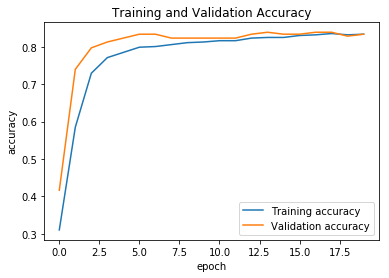

In [ ]:
plt.plot(history.epoch,history.history['accuracy'],label="Training accuracy")
plt.plot(history.epoch,history.history['val_accuracy'],label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

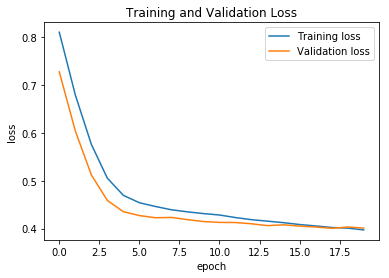

In [ ]:
plt.plot(history.epoch,history.history['loss'],label="Training loss")
plt.plot(history.epoch,history.history['val_loss'],label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
predictions = DL_model_1.predict(test_data)

In [ ]:
f1_score(test_label,y_predict)*100


79.36507936507935

In [ ]:
loss,accuracy = DL_model_1.evaluate(test_data,test_label)

7/7 [==============================] - 3s 414ms/step - loss: 0.4128 - accuracy: 0.8135


<br>

- Conv 1D

In [ ]:
temp_data = scaler.fit_transform(temp_data)
sample_size = temp_data.shape[0] # number of samples in train set i.e rows
time_steps  = temp_data.shape[1] # number of features in train set i.e columns
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = temp_data.reshape(sample_size,time_steps,input_dimension)
test_data_reshaped = test_data.reshape(test_data.shape[0],test_data.shape[1],input_dimension)
print("After reshape train data set shape:\n", train_data_reshaped.shape)
print("1 Sample shape:\n",train_data_reshaped[0].shape)
print("An example sample:\n", train_data_reshaped[0])

After reshape train data set shape:
 (768, 5, 1)
1 Sample shape:
 (5, 1)
An example sample:
 [[-0.18505628]
 [ 0.43648767]
 [-0.57860306]
 [ 0.77049781]
 [ 0.24660462]]


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_conv1D_model_1():

  n_timesteps = train_data_reshaped.shape[1] #5
  n_features  = train_data_reshaped.shape[2] #1 
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=100, kernel_size=10, activation='relu', name="Conv1D_1",padding="same"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(filters=50, kernel_size=10, activation='relu', name="Conv1D_2",padding="same"))
  model.add(keras.layers.Dropout(0.5))
#   model.add(keras.layers.Conv1D(filters=25, kernel_size=3, activation='relu', name="Conv1D_3",padding="same"))
  
  model.add(keras.layers.MaxPooling1D(pool_size=5, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='sigmoid', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2",activation="sigmoid"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['accuracy'])
  return model

model_conv1D = build_conv1D_model_1()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 5, 100)            1100      
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 100)            0         
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 5, 50)             50050     
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
MaxPooling1D (MaxPooling1D)  (None, 1, 50)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50)                0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)               

In [ ]:
history1 = model_conv1D.fit(train_data_reshaped, temp_label, epochs=20,validation_split=0.2, verbose=1)

Epoch 1/20
20/20 [==============================] - 96s 5s/step - loss: 0.1929 - accuracy: 0.7280 - val_loss: 0.1708 - val_accuracy: 0.7532
Epoch 2/20
20/20 [==============================] - 96s 5s/step - loss: 0.1449 - accuracy: 0.8111 - val_loss: 0.1501 - val_accuracy: 0.8182
Epoch 3/20
20/20 [==============================] - 96s 5s/step - loss: 0.1386 - accuracy: 0.8127 - val_loss: 0.1423 - val_accuracy: 0.8117
Epoch 4/20
20/20 [==============================] - 97s 5s/step - loss: 0.1363 - accuracy: 0.8208 - val_loss: 0.1400 - val_accuracy: 0.8117
Epoch 5/20
20/20 [==============================] - 96s 5s/step - loss: 0.1354 - accuracy: 0.8208 - val_loss: 0.1415 - val_accuracy: 0.8182
Epoch 6/20
20/20 [==============================] - 98s 5s/step - loss: 0.1314 - accuracy: 0.8274 - val_loss: 0.1380 - val_accuracy: 0.8182
Epoch 7/20
20/20 [==============================] - 96s 5s/step - loss: 0.1301 - accuracy: 0.8306 - val_loss: 0.1367 - val_accuracy: 0.8182
Epoch 8/20
20/20 [==

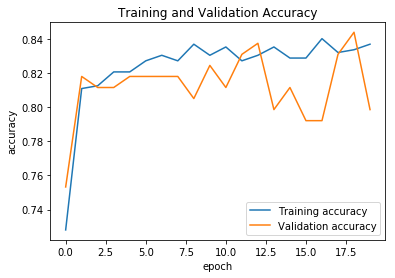

In [ ]:
plt.plot(history1.epoch,history1.history['accuracy'],label="Training accuracy")
plt.plot(history1.epoch,history1.history['val_accuracy'],label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

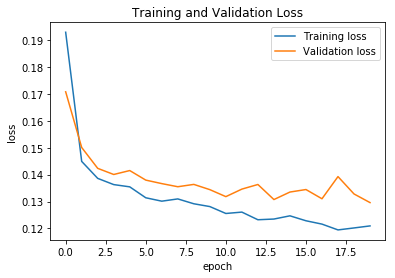

In [ ]:
plt.plot(history1.epoch,history1.history['loss'],label="Training loss")
plt.plot(history1.epoch,history1.history['val_loss'],label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
test_predictions = model_conv1D.predict_classes(test_data_reshaped).flatten()

In [ ]:
f1_score(test_label,test_predictions)

0.797752808988764

<br>

GridSearch on Fully connected NN

In [121]:
def build_model(n_hidden=2, n_neurons=30, learning_rate=3e-3, input_shape=train_data.shape[1:],epochs=5,batch_size=5,optimizer='Adam'):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1,activation="sigmoid"))
    optimizer = optimizers.RMSprop(lr=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [128]:
parameter_space = {
'n_neurons': [25,30,35],
'optimizer': ['sgd', 'adam'],
'epochs': [5,10],
'batch_size': [5,10,100],

}

In [129]:
keras_classifier = KerasClassifier(build_model)

In [130]:
classifier = GridSearchCV(keras_classifier, parameter_space, n_jobs=-1,scoring="accuracy", cv=3)

In [131]:
classifier.fit(train_data,train_label)

Epoch 1/10
116/116 [==============================] - 1s 1ms/step - loss: 0.5168 - accuracy: 0.7693
Epoch 2/10
116/116 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8018
Epoch 3/10
116/116 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8478
Epoch 4/10
116/116 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8295
Epoch 5/10
116/116 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8275
Epoch 6/10
116/116 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8257
Epoch 7/10
116/116 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8625
Epoch 8/10
116/116 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8585
Epoch 9/10
116/116 [==============================] - 0s 1ms/step - loss: 0.3423 - accuracy: 0.8391
Epoch 10/10
116/116 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.8483

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f75990cc190>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [5, 10, 100], 'epochs': [5, 10],
                         'n_neurons': [25, 30, 35],
                         'optimizer': ['sgd', 'adam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [134]:
predictions  = classifier.predict(test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [137]:
classifier.best_params_

{'batch_size': 5, 'epochs': 10, 'n_neurons': 35, 'optimizer': 'adam'}

In [136]:
f1_score(test_label,predictions)*100

79.54545454545455

In [ ]:
# def objective_classifier(trial): 
    
#     classifier_name = trial.suggest_categorical("classifier", ["fully_connected_NN"])
    
#     if classifier_name == "fully_connected_NN":
#         kwargs={}
#         kwargs['activation'] = trial.suggest_categorical("activation",["relu","sigmoid","tanh"])
#         n_layers = trial.suggest_int("n_layers", 1, 2,3)
#         model = keras.Sequential()
#         for i in range(n_layers):
#           units = trial.suggest_int("units",25,35,step=5,log=False)
#           model.add(keras.layers.Dense(units,activation="relu"))
#         model.add(keras.layers.Dense(1))
#         # model = keras.models.Model(inputs=[input_], outputs=[output],**kwargs)
        
# #     elif classifier_name == "LogisticRegression":
# # #         penalty = trial.suggest_categorical("penalty", [ "l2", "elasticnet", "none"])
# #         solver = trial.suggest_categorical("solver",[ "lbfgs", "liblinear", "sag", "saga"])
# #         model = LogisticRegression(random_state=10,solver=solver)

# #     elif classifier_name == "KNN":
# #         n_neighbors = trial.suggest_int("n_neighbors",5,15,step=1,log=False)
# #         algorithm = trial.suggest_categorical("algorithm", ["auto", "ball_tree", "kd_tree", "brute"])
# #         metric = trial.suggest_categorical("metric",["euclidean","manhattan","chebyshev","minkowski"])
# #         weights = trial.suggest_categorical("weights",["uniform","distance"])
# #         model = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm=algorithm,metric=metric,weights=weights)
    
# #     elif classifier_name == "SVC":
# #         kernel = trial.suggest_categorical("kernel", ["linear","poly","rbf","sigmoid","precomputed"])
# #         gamma = trial.suggest_categorical("gamma", ["auto","scale"])
# #         model= SVC(random_state=10,kernel=kernel,gamma=gamma)
#     score = sklearn.model_selection.cross_val_score(model, temp_data, temp_label.iloc[:,0].ravel(), cv=3)
#     accuracy = score.mean()
    
#     return accuracy